In [1]:
!pip install nltk

  Using cached https://files.pythonhosted.org/packages/6f/ed/9c755d357d33bc1931e157f537721efb5b88d2c583fe593cc09603076cc3/nltk-3.4.zip
  Using cached https://files.pythonhosted.org/packages/c5/10/369f50bcd4621b263927b0a1519987a04383d4a98fb10438042ad410cf88/singledispatch-3.4.0.3-py2.py3-none-any.whl
  Stored in directory: C:\Users\vaish\AppData\Local\pip\Cache\wheels\4b\c8\24\b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk


In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 

In [4]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)


In [5]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']


In [6]:
train_data = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=categories, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [7]:
print(type(train_data))
print(train_data.keys())
#print(train_data.data)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(train_data.data))
print(len(test_data.data))

4732
3150


In [7]:
train_data_for_plot = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=None, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
print(len(train_data_for_plot.target_names))

20


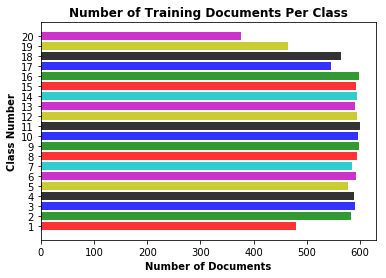

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
indices = np.arange(20)
no_of_datapoints = []
for i in range(0, len(train_data_for_plot.target_names)):
    no_of_datapoints.append((train_data_for_plot.target == i).sum())


bar_width = 0.75
colors = 'rgbkymc'
bars = plt.barh(indices, no_of_datapoints, bar_width,alpha = 0.8, color = colors, align="edge")
plt.xlabel('Number of Documents', fontweight="bold", )
plt.ylabel('Class Number', fontweight="bold")
plt.title('Number of Training Documents Per Class', fontweight="bold")
plt.yticks(indices + bar_width/2, list(range(1, 21)))
plt.show()


In [9]:
import nltk
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')

print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))

from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
# of combined_stopwords:	 410


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', 'be', 'walk', 'to', 'school']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())
def stem_rmv_punc_without_lemm(doc):
    return (word for word in analyzer(doc) if word not in combined_stopwords and not word.isdigit())

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def feature_extraction_train(x_train,min_dif_value,to_Lemmatize = True):
    if(to_Lemmatize):
        count_vect = CountVectorizer(min_df=min_dif_value,analyzer=stem_rmv_punc, stop_words='english')
    else:
        count_vect = CountVectorizer(min_df=min_dif_value,analyzer=stem_rmv_punc_without_lemm, stop_words='english')
        
    X_train_counts = count_vect.fit_transform(train_data.data)
    return X_train_counts,count_vect

def feature_extraction_test(x_test,count_vect):
    X_test_counts = count_vect.transform(test_data.data)
    
    return X_test_counts 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_counts,count_vect = feature_extraction_train(train_data, 3, True)
print(X_train_counts.shape)

X_train_counts1, count_vect1 = feature_extraction_train(train_data, 4, False)
print(X_train_counts1.shape)

X_test_counts = feature_extraction_test(test_data,count_vect)
print(X_test_counts.shape)

X_test_counts1 = feature_extraction_test(test_data,count_vect1)
print(X_test_counts1.shape)



In [ ]:
#count_vect2 = CountVectorizer(min_df=3, stop_words='english')
#X_train_counts2 = count_vect2.fit_transform(train_data.data)
#print(X_train_counts2.shape)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(4732, 16292)


In [17]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(3150, 16292)


In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)


X_train_orig_svd = svd.inverse_transform(X_train_reduced_svd)
diff = (np.linalg.norm(X_train_tfidf - X_train_orig_svd, ord = 'fro'))**2
print(diff)

vt = svd.fit_transform(X_train_tfidf)
u_and_sigma = svd.components_
xhat1 = vt.dot(u_and_sigma)

diff1 = (np.linalg.norm(X_train_tfidf - xhat1, ord = 'fro'))**2
print(diff1)

(4732, 50)


In [19]:
X_test_reduced = svd.transform(X_test_tfidf)
print(X_test_reduced.shape)

(3150, 50)


In [20]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=0)
X_train_reduced_nmf = nmf.fit_transform(X_train_tfidf)
print(X_train_reduced_nmf.shape)

X_train_orig_nmf = nmf.inverse_transform(X_train_reduced_nmf)
diff = (np.linalg.norm(X_train_tfidf - X_train_orig_nmf, ord = 'fro'))
print(diff)

w1 = nmf.fit_transform(X_train_tfidf)
h1 = nmf.components_
xhat1 = w1.dot( h1)
diff1 = (np.linalg.norm(X_train_tfidf - xhat1, ord = 'fro'))**2
print(diff1)

(4732, 50)


In [21]:
X_test_reduced_nmf = nmf.transform(X_test_tfidf)
print(X_test_reduced_nmf.shape)

(3150, 50)


In [22]:
############## Question 4###############

In [24]:
###### Building the category for each point in the train dataset####

In [43]:
y_train = np.zeros((len(train_data.data)))
for i in range(len(train_data.target)):
    if(train_data.target[i] < 3):
        y_train[i] = 0
    else:
        y_train[i] = 1

In [46]:
y_test = np.zeros((len(test_data.data)))
for i in range(len(test_data.target)):
    if(test_data.target[i] < 3):
        y_test[i] = 0
    else:
        y_test[i] = 1

In [47]:
np.unique(y_test)

array([0., 1.])

In [23]:
from sklearn.svm import LinearSVC

In [59]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
hard_margin_svc.fit(X_train_reduced, y_train)
#LinearSVC(loss='hinge',C=0.01).fit(W_train, twenty_train.target).predict(W_test)
y_pred_hard = hard_margin_svc.predict(X_test_reduced)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [65]:
np.unique(y_train)

array([0., 1.])

In [62]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
soft_margin_svc.fit(X_train_reduced, y_train)
#LinearSVC(loss='hinge',C=0.01).fit(W_train, twenty_train.target).predict(W_test)
y_pred_soft = soft_margin_svc.predict(X_test_reduced)

In [63]:
np.unique(y_pred_soft)

array([1.])

In [66]:
y_pred_soft

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
numpy.isnan(myarray).any()

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


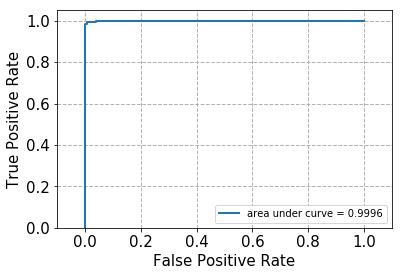

In [60]:
fit_predict_and_plot_roc(hard_margin_svc, X_train_reduced, y_train, X_test_reduced, y_pred_hard)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\ranking.py:648: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\ranking.py:114: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


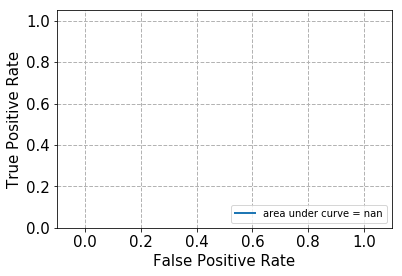

In [64]:
fit_predict_and_plot_roc(soft_margin_svc, X_train_reduced, y_train, X_test_reduced, y_pred_soft)

In [95]:
############# Metrics #################

In [97]:
def disp_metrics(y_test, y_pred):
    print("The confusion matrix is: ")
    print(confusion_matrix(y_test, y_pred))
    print("The accuracy is: ")
    print(accuracy_score(y_test, y_pred))
    print("The recall is: ")
    print(recall_score(y_test, y_pred))
    print("The precision is: ")
    print(precision_score(y_test, y_pred))
    print("The F1-score is: ")
    print(f1_score(y_test, y_pred))

In [98]:
#Hard margin
disp_metrics(y_test, y_pred_hard)

The confusion matrix is: 
[[ 878  297]
 [  42 1933]]
The accuracy is: 
0.8923809523809524
The recall is: 
0.9787341772151898
The precision is: 
0.8668161434977578
The F1-score is: 
0.9193816884661118


In [99]:
#Soft margin
disp_metrics(y_test, y_pred_soft)

The confusion matrix is: 
[[   0 1175]
 [   0 1975]]
The accuracy is: 
0.626984126984127
The recall is: 
1.0
The precision is: 
0.626984126984127
The F1-score is: 
0.7707317073170732


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [88]:
k_vals = [i for i in range(-3, 4)]

In [89]:
k_vals

[-3, -2, -1, 0, 1, 2, 3]

In [92]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LinearSVC(loss = 'hinge', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

In [93]:
best_c

100

In [94]:
max_score

0.9321126760563381

In [100]:
clf = LinearSVC(loss = 'hinge', C = 100)
clf.fit(X_train_reduced, y_train)
y_pred_best = clf.predict(X_test_reduced)
disp_metrics(y_test, y_pred_best)

The confusion matrix is: 
[[1003  172]
 [  97 1878]]
The accuracy is: 
0.9146031746031746
The recall is: 
0.9508860759493671
The precision is: 
0.9160975609756098
The F1-score is: 
0.9331677018633541


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


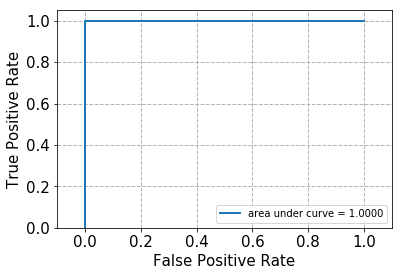

In [101]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_pred_best)

In [102]:
################## Question 5 #############
############# Logistic Regression #########

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr_clf = LogisticRegression(penalty='l2', C = 1e30)

In [108]:
lr_clf.fit(X_train_reduced, y_train)
y_lr_pred = lr_clf.predict(X_test_reduced)

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
disp_metrics(y_test, y_lr_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


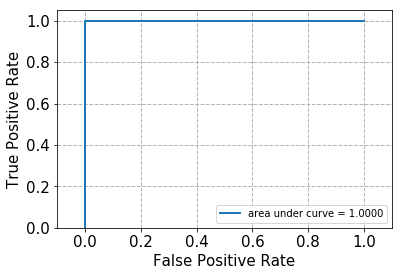

In [111]:
fit_predict_and_plot_roc(lr_clf, X_train_reduced, y_train, X_test_reduced, y_lr_pred)

In [129]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LogisticRegression(penalty='l2', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [130]:
best_c

1000

In [131]:
clf = LogisticRegression(penalty='l2', C = 1000)
clf.fit(X_train_reduced, y_train)
y_clf_pred = clf.predict(X_test_reduced)
disp_metrics(y_test, y_clf_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


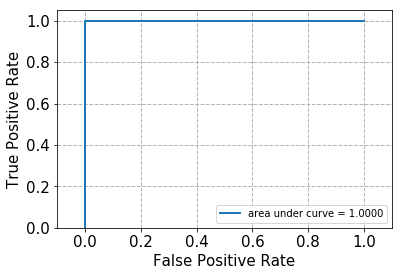

In [122]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_clf_pred)

In [125]:
max_score = np.NINF
best_c = 0
for k in k_vals:
    clf = LogisticRegression(penalty='l1', C = 10 ** k)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(clf, X_train_reduced, y_train, cv=cv, scoring='accuracy')
    score = np.mean(scores)
    if score > max_score:
        max_score = score
        best_c = 10 ** k

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [126]:
best_c

1000

In [127]:
clf = LogisticRegression(penalty='l1', C = 1000)
clf.fit(X_train_reduced, y_train)
y_clf_pred = clf.predict(X_test_reduced)
disp_metrics(y_test, y_clf_pred)

The confusion matrix is: 
[[ 997  178]
 [  86 1889]]
The accuracy is: 
0.9161904761904762
The recall is: 
0.9564556962025317
The precision is: 
0.9138848572810837
The F1-score is: 
0.9346857991093517


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


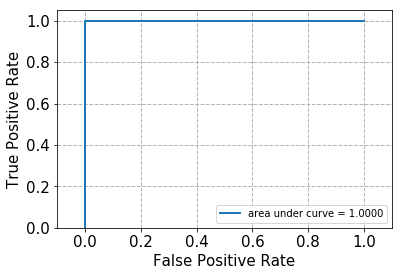

In [128]:
fit_predict_and_plot_roc(clf, X_train_reduced, y_train, X_test_reduced, y_clf_pred)

In [ ]:
################## Question 6 #############
################## Naïve Bayes ############

from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
print(X_train_reduced.shape)
print(y_train.shape)

In [ ]:
gnb_clf.fit(X_train_reduced, y_train)

In [ ]:
y_gnb_pred = gnb_clf.predict(X_test_reduced)

In [ ]:
disp_metrics(y_test, y_gnb_pred)

In [ ]:
fit_predict_and_plot_roc(gnb_clf, X_train_reduced, y_train, X_test_reduced, y_gnb_pred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)

N_FEATURES_OPTIONS = [50]
C_OPTIONS = [1000]
# REG_OPTIONS = ['l1', 'l2']
# REG_STRENGTH_OPTIONS = [0.1, 1, 10]

param_grid = [
    {
        'vect': [CountVectorizer()],
        'vect__min_df': [3,5],
        'vect__analyzer':[stem_rmv_punc, stem_rmv_punc_without_lemm],
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LinearSVC()],
        'clf__C': C_OPTIONS
    },
    {
        'vect': [CountVectorizer()],
        'vect__min_df': [3,5],
        'vect__analyzer':[stem_rmv_punc, stem_rmv_punc_without_lemm],
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LogisticRegression()],
        'clf__penalty': ['l1','l2'],
        'clf__C':[1000]
#       'clf__C': C_OPTIONS
    },
    {
        'vect': [CountVectorizer()],
        'vect__min_df': [3,5],
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [GaussianNB()],
#       'clf__C': C_OPTIONS
    }
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']


In [ ]:
grid = GridSearchCV(pipeline, cv=3, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_data.data, y_train)
rmtree(cachedir)

In [ ]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

In [ ]:
np.unique(y_train_wo_header_footer)

In [ ]:
grid = GridSearchCV(pipeline, cv=3, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_data_wo_header_footer.data, train_data_wo_header_footer.target)
rmtree(cachedir)

In [ ]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

# Question 8 

### Multiclass Classification

1. Naive Bayes
2. One vs One SVM
3. One vs Rest SVM

With Confusion Matrix, Accuracy, Precision, Recall and F1 Scores for each.

In [28]:
!pip install nltk
%matplotlib inline

In [29]:
import random
from string import punctuation
import pickle

import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asavari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asavari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asavari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
np.random.seed(42)
random.seed(42)

### Fetching Train and Test Data for the 4 categories

In [31]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian']

In [32]:
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

### Feature Extraction

In [33]:
stop_words_skt = text.ENGLISH_STOP_WORDS
nltk.download('stopwords')
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

# of combined_stopwords:	 410


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asavari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
wnl = nltk.wordnet.WordNetLemmatizer()
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [36]:
count_vect = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words='english')

X_train_counts = count_vect.fit_transform(train_data.data)
print(X_train_counts.shape)

X_test_counts = count_vect.transform(test_data.data)
print(X_test_counts.shape)

(2352, 8396)
(1565, 8396)


In [37]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(2352, 8396)
(1565, 8396)


In [38]:
svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

X_test_reduced = svd.transform(X_test_tfidf)
print(X_test_reduced.shape)

(2352, 50)
(1565, 50)


### Naive Bayesian Classifier

In [39]:
gnb_parameters = [{'var_smoothing':1e-09}, {'var_smoothing':1e-07},  {'var_smoothing':1e-05}]
f1_scores = []
gnb_list = []
for p in gnb_parameters:
    gnb = GaussianNB()
    gnb.set_params(**p)
    gnb.fit(X_train_reduced, train_data.target)
    gnb_test_predictions = gnb.predict(X_test_reduced)
    gnb_list.append(gnb)
    f1_scores.append(f1_score(test_data.target, gnb_test_predictions, average = 'weighted') )
    
print (f1_scores)
    
gnb = gnb_list[(np.argmax(f1_scores))]
gnb_test_predictions = gnb.predict(X_test_reduced)

[0.6717528520739757, 0.6717528520739757, 0.6717528520739757]


[[232  37 119   4]
 [114 148 120   3]
 [ 45  42 301   2]
 [  0   0  17 381]]


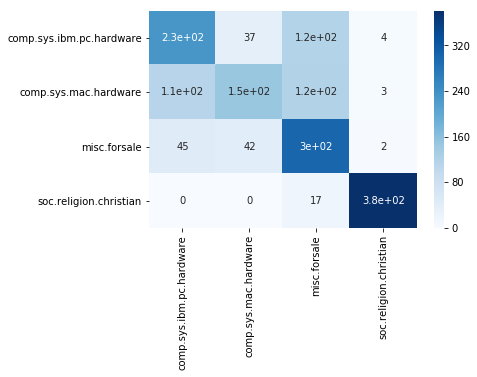

In [40]:
gnb_con_matrix = confusion_matrix(test_data.target, gnb_test_predictions)
print (gnb_con_matrix)

df_cm = pd.DataFrame(gnb_con_matrix, index = [l for l in train_data.target_names],
                  columns = [l for l in train_data.target_names])
sn.heatmap(df_cm, annot=True, cmap="Blues")

In [41]:
gnb_accuracy = accuracy_score(test_data.target, gnb_test_predictions)
gnb_precision = precision_score(test_data.target, gnb_test_predictions, average = 'macro')
gnb_recall = recall_score(test_data.target, gnb_test_predictions, average = 'macro')
gnb_f1 = f1_score(test_data.target, gnb_test_predictions, average = 'macro')

print ("Accuracy:", gnb_accuracy*100.0 , "%\nPrecision:", gnb_precision*100.0, "%\nRecall:", gnb_recall*100.0, "%\nF1:", gnb_f1*100, "%")

Accuracy: 67.8594249201278 %
Precision: 69.06627031198585 %
Recall: 67.63334057662844 %
F1: 66.97373643301569 %


### One Vs One SVC

In [42]:
svm_ovo_parameters = [{'C':1e-05}, {'C':1e-02}, {'C':1}, {'C':100}, {'C':10000}]
f1_scores = []
svm_ovo_list = []
for p in svm_ovo_parameters:
    svc_ovo = LinearSVC(random_state=42)
    svc_ovo.set_params(**p)
    svm_ovo = OneVsOneClassifier(svc_ovo)
    svm_ovo.fit(X_train_reduced, train_data.target)
    svm_ovo_test_predictions = svm_ovo.predict(X_test_reduced)
    svm_ovo_list.append(svm_ovo)
    f1_scores.append(f1_score(test_data.target, svm_ovo_test_predictions, average = 'weighted') )
    
print (f1_scores)

svm_ovo = svm_ovo_list[(np.argmax(f1_scores))]
svm_ovo_test_predictions = svm_ovo.predict(X_test_reduced)

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm

[0.3289583593377138, 0.8503158795030694, 0.8848021467127868, 0.8856870146466452, 0.7943184416737072]


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[322  47  22   1]
 [ 36 331  18   0]
 [ 25  22 339   4]
 [  3   1   0 394]]


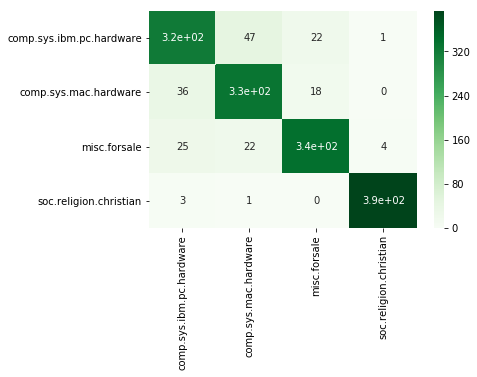

In [43]:
svm_ovo_con_matrix = confusion_matrix(test_data.target, svm_ovo_test_predictions)
print (svm_ovo_con_matrix)
df_cm = pd.DataFrame(svm_ovo_con_matrix, index = [l for l in train_data.target_names],
                  columns = [l for l in train_data.target_names])
sn.heatmap(df_cm, annot=True, cmap="Greens")

In [17]:
svm_ovo_accuracy = accuracy_score(test_data.target, svm_ovo_test_predictions)
svm_ovo_precision = precision_score(test_data.target, svm_ovo_test_predictions, average = 'weighted')
svm_ovo_recall = recall_score(test_data.target, svm_ovo_test_predictions, average = 'weighted')
svm_ovo_f1 = f1_score(test_data.target, svm_ovo_test_predictions, average = 'weighted')

print ("Accuracy:", svm_ovo_accuracy*100.0 , "%\nPrecision:", svm_ovo_precision*100.0, "%\nRecall:", svm_ovo_recall*100.0, "%\nF1:", svm_ovo_f1*100, "%")

Accuracy: 88.43450479233226 %
Precision: 88.53599455984693 %
Recall: 88.43450479233226 %
F1: 88.48021467127867 %


### One Vs Rest SVC

In [18]:
svm_ovr_parameters = [{'C':1e-05}, {'C':1e-02}, {'C':1}, {'C':100}, {'C':10000}]
f1_scores = []
svm_ovr_list = []
for p in svm_ovr_parameters:
    svc_ovr = LinearSVC(random_state=42)
    svc_ovr.set_params(**p)
    svm_ovr = OneVsRestClassifier(svc_ovr)
    svm_ovr.fit(X_train_reduced, train_data.target)
    svm_ovr_test_predictions = svm_ovr.predict(X_test_reduced)
    svm_ovr_list.append(svm_ovr)
    f1_scores.append(f1_score(test_data.target, svm_ovr_test_predictions, average = 'weighted') )
    
print (f1_scores)

svm_ovr = svm_ovr_list[(np.argmax(f1_scores))]
svm_ovr_test_predictions = svm_ovr.predict(X_test_reduced)

[[314  52  26   0]
 [ 39 321  24   1]
 [ 23  18 348   1]
 [  5   1   3 389]]


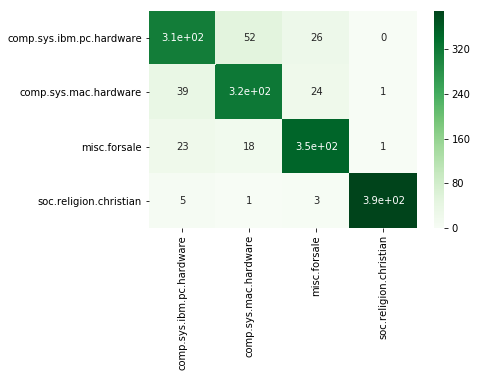

In [19]:
svm_ovr_con_matrix = confusion_matrix(test_data.target, svm_ovr_test_predictions)
print (svm_ovr_con_matrix)

df_cm = pd.DataFrame(svm_ovr_con_matrix, index = [l for l in train_data.target_names],
                  columns = [l for l in train_data.target_names])
sn.heatmap(df_cm, annot=True, cmap="Greens")

In [20]:
svm_ovr_accuracy = accuracy_score(test_data.target, svm_ovr_test_predictions)
svm_ovr_precision = precision_score(test_data.target, svm_ovr_test_predictions, average = 'weighted')
svm_ovr_recall = recall_score(test_data.target, svm_ovr_test_predictions, average = 'weighted')
svm_ovr_f1 = f1_score(test_data.target, svm_ovr_test_predictions, average = 'weighted')

print ("Accuracy:", svm_ovr_accuracy*100.0 , "%\nPrecision:", svm_ovr_precision*100.0, "%\nRecall:", svm_ovr_recall*100.0, "%\nF1:", svm_ovr_f1*100, "%")

Accuracy: 87.66773162939297 %
Precision: 87.71575294893401 %
Recall: 87.66773162939297 %
F1: 87.67975550963494 %
